In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

In [4]:
n = 1
def qrng(n,string):
    res = {}
    for i in range(string):
        qc = QuantumCircuit(n,n)
        qc.h(range(n))
        qc.barrier()
        qc.measure(range(n),range(n))
        shots = 1
        backend = Aer.get_backend('qasm_simulator')
        result = execute(qc, backend, shots = shots).result().get_counts()
        res[i] = int(list(result.keys())[0])
    return res
bins = qrng(1,10)
bins.values()

dict_values([1, 1, 1, 0, 1, 0, 0, 1, 1, 0])

In [7]:
n = 4
qc = QuantumCircuit(n, n)
qc.h(range(n))
qc.barrier()
qc.measure(range(n), range(n))
display(qc.draw())

┌───┐ ░ ┌─┐         
q_0: ┤ H ├─░─┤M├─────────
     ├───┤ ░ └╥┘┌─┐      
q_1: ┤ H ├─░──╫─┤M├──────
     ├───┤ ░  ║ └╥┘┌─┐   
q_2: ┤ H ├─░──╫──╫─┤M├───
     ├───┤ ░  ║  ║ └╥┘┌─┐
q_3: ┤ H ├─░──╫──╫──╫─┤M├
     └───┘ ░  ║  ║  ║ └╥┘
c: 4/═════════╩══╩══╩══╩═
              0  1  2  3

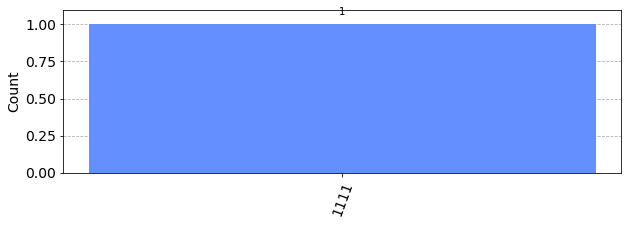

In [8]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc,backend).result().get_counts()
display(plot_histogram(result,figsize=(10,3)))

In [9]:
def qrng_int(n,string):
    res = {}
    for i in range(string):
        qc = QuantumCircuit(n,n) #n qubits e n classical bits
        qc.h(range(n)) # todos os qubits em superposição
        qc.barrier()
        qc.measure(range(n),range(n)) #medindo e guargando o resultado nos
                                    #bits clássicos
        
        shots = 1
        backend = Aer.get_backend('qasm_simulator')
        result = execute(qc, backend, shots = shots).result().get_counts()
        res[i] = int(list(result.keys())[0],2)
    return res
n = 4
size = 100
ints = qrng_int(n,size)
ints.values()

dict_values([14, 15, 15, 9, 9, 10, 11, 6, 3, 14, 15, 3, 2, 6, 15, 12, 7, 7, 13, 5, 13, 12, 0, 15, 1, 8, 12, 12, 6, 8, 11, 15, 9, 1, 10, 8, 6, 5, 14, 3, 5, 7, 4, 13, 7, 3, 3, 4, 10, 1, 14, 4, 3, 2, 6, 13, 6, 3, 6, 6, 12, 3, 14, 1, 8, 9, 14, 11, 11, 9, 11, 10, 9, 2, 11, 13, 11, 11, 0, 10, 13, 9, 5, 11, 8, 10, 5, 0, 4, 11, 1, 14, 3, 13, 10, 14, 8, 8, 13, 8])